In [2]:
### importing libraries
##data frame libraries
import pandas as pd
import numpy as np
## visualise libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
#featuring
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
lead_df=pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.shape

(9240, 37)

Data set contians 9240 rows and 37 columns

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
100*lead_df.isnull().mean().sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
df_columns=lead_df.columns
df_columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
for columns in df_columns:
  count_column = lead_df[columns].value_counts().reset_index()
  print(f"Value Counts for {columns}:\n{count_column}\n")

Value Counts for Prospect ID:
                                     index  Prospect ID
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620            1
1     22e9d4ef-d294-4ebf-81c7-7c7a1105aeea            1
2     46befc49-253a-419b-abea-2fd978d2e2b1            1
3     9d35a2c2-09d8-439f-9875-0e8bbf267f5a            1
4     f0de9371-4dc2-48c2-9785-a08d6fc4fcb5            1
...                                    ...          ...
9235  ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3            1
9236  644099a2-3da4-4d23-9546-7676340a372b            1
9237  2a093175-415b-4321-9e69-ed8d9df65a3c            1
9238  c66249a3-8500-4c66-a511-312d914573de            1
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff            1

[9240 rows x 2 columns]

Value Counts for Lead Number:
       index  Lead Number
0     660737            1
1     603303            1
2     602561            1
3     602557            1
4     602540            1
...      ...          ...
9235  630422            1
9236  630405            1
9237  63

In [11]:
# Identify columns with only one unique value
columns_to_drop = [col for col in lead_df.columns if lead_df[col].nunique() == 1]

# Drop the identified columns
lead_df.drop(columns=columns_to_drop, inplace=True)


In [12]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [13]:
 ##These columns contain unique values for each entry and can be safely removed.
columns2=['Lead Number','Prospect ID']
lead_df.drop(columns2,axis=1,inplace=True)

In [14]:
##We will replace the 'Select' entries in these columns with NaN values,
##as 'Select' indicates that the option was not chosen by the customer.
lead_df=lead_df.replace("Select", np.nan)

In [15]:
lead_df.isnull().mean().sort_values(ascending = False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

# Removing columns containing over 35% missing values.

In [16]:
threshold = 35
lead_df = lead_df.drop([col for col in lead_df.columns if lead_df[col].isnull().mean() * 100 >= threshold], axis=1)



In [17]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

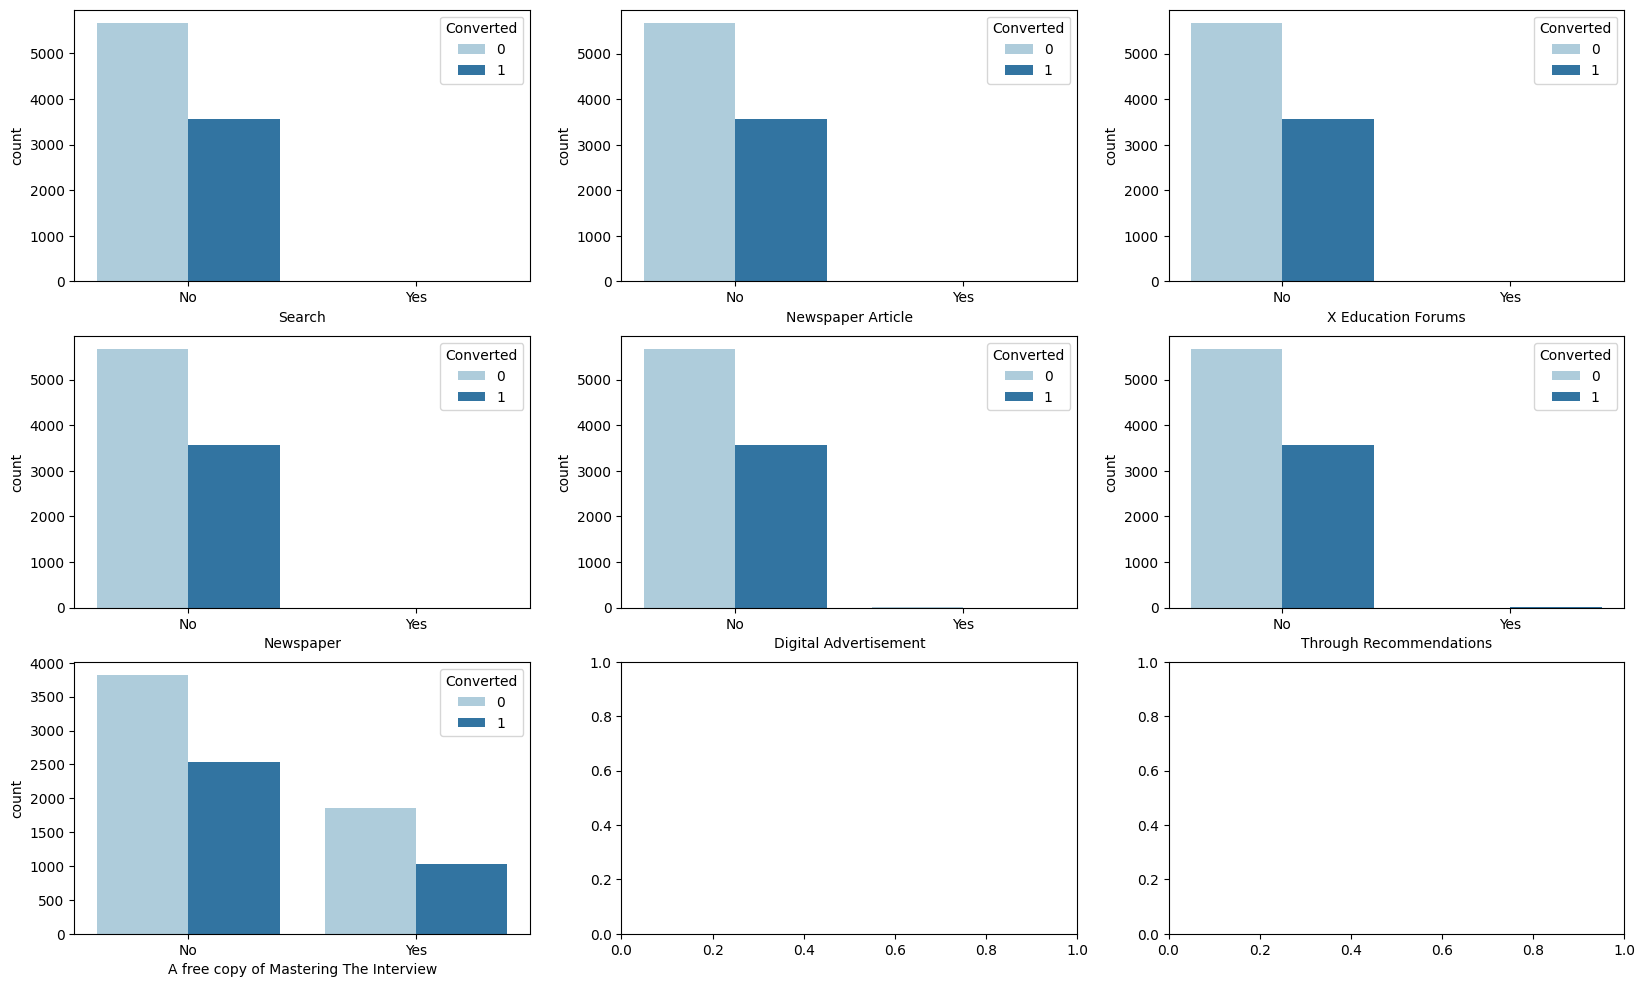

In [18]:
col_3=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
          'A free copy of Mastering The Interview']

fig, axs = plt.subplots(3, 3, figsize=(20, 12))

for i, column in enumerate(col_3):
    row, col = divmod(i, 3)
    sns.countplot(x=column, hue="Converted", data=lead_df, ax=axs[row, col], palette='Paired')

plt.show()

From above visualize except '**A free copy of Mastering The Interview**' rest columns are completely are imbalance columns





In [19]:
col_4=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
lead_df.drop(col_4,axis=1,inplace=True)

In [20]:
lead_df['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

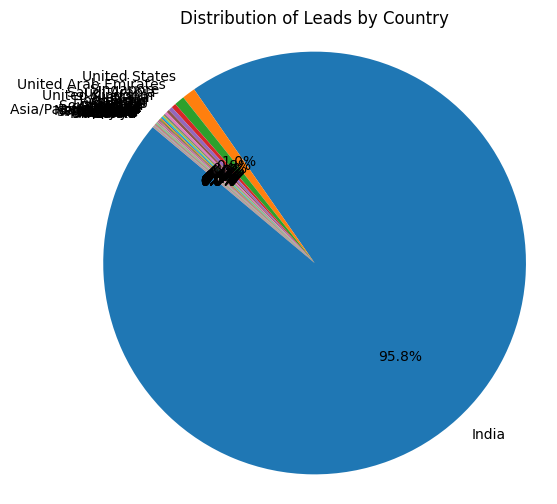

In [21]:
country_counts = lead_df['Country'].value_counts()

# Plot a pie chart for the 'Country' column
plt.figure(figsize=(6, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Leads by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

1.Dropping the "Country" column due to its highly skewed values

2.where 95% of the data is represented by "India"


In [22]:
lead_df.drop('Country', axis=1, inplace=True)

In [23]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
lead_df.isna().mean().sort_values(ascending = False)*100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [25]:
# Convert all entries in the 'Lead Source' column to uppercase
lead_df['Lead Source'] = lead_df['Lead Source'].str.upper()

In [26]:
lead_df['Lead Source'].value_counts()

GOOGLE               2873
DIRECT TRAFFIC       2543
OLARK CHAT           1755
ORGANIC SEARCH       1154
REFERENCE             534
WELINGAK WEBSITE      142
REFERRAL SITES        125
FACEBOOK               55
BING                    6
CLICK2CALL              4
SOCIAL MEDIA            2
LIVE CHAT               2
PRESS_RELEASE           2
PAY PER CLICK ADS       1
BLOG                    1
WELEARN                 1
WELEARNBLOG_HOME        1
YOUTUBECHANNEL          1
TESTONE                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
### Putting all the entries with value counts less than or equal 60 into 'others'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['TESTONE', 'YOUTUBECHANNEL', 'WELEARNBLOG_HOME', 'WELEARN ', 'BLOG ', 'PAY PER CLICK ADS', 'PRESS_RELEASE', 'LIVE CHAT', 'CLICK2CALL', 'BING', 'FACEBOOK', 'SOCIAL MEDIA'], 'Others')


In [28]:
lead_df['Lead Source'].value_counts()

GOOGLE              2873
DIRECT TRAFFIC      2543
OLARK CHAT          1755
ORGANIC SEARCH      1154
REFERENCE            534
WELINGAK WEBSITE     142
REFERRAL SITES       125
Others                75
BLOG                   1
WELEARN                1
NC_EDM                 1
Name: Lead Source, dtype: int64

In [29]:
# replacing nan values with most occured value given by the mode value of the column

lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0],inplace=True)

# visualise the lead source

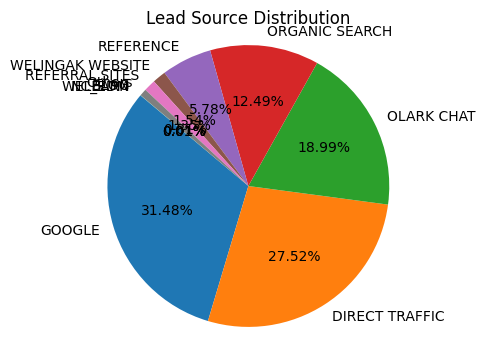

In [30]:
# Assuming you have a DataFrame named lead_df
lead_source_counts = lead_df['Lead Source'].value_counts()

# Create a pie chart for the 'Source' column
plt.figure(figsize=(4, 4))
plt.pie(lead_source_counts, labels=lead_source_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Lead Source Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [31]:
lead_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

<Axes: >

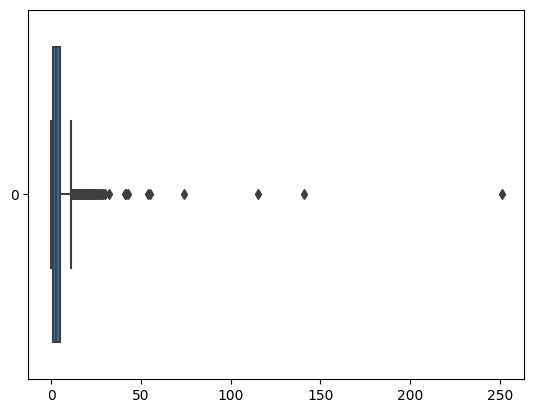

In [32]:
sns.boxplot(lead_df['TotalVisits'],orient='h')

In [33]:
lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [34]:
##To handle missing values in the 'TotalVisits' column, we will impute them with the median of the column,
##a robust choice given the presence of outliers.
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median(),inplace=True)

In [35]:
## describing the numerical column 'Page Views Per Visit'
lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

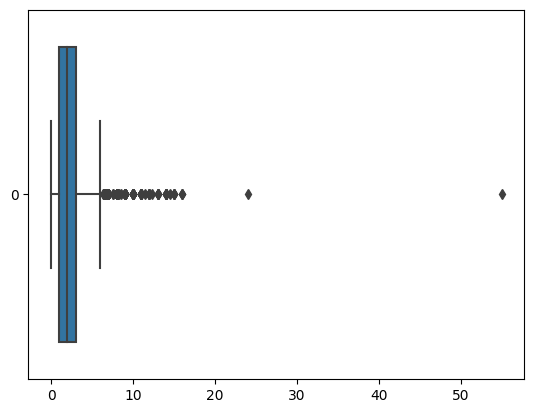

In [36]:
sns.boxplot(lead_df['Page Views Per Visit'],orient='h')

In [37]:
##To address missing values in the 'Page Views Per Visit' column, we will utilize the median of the column for imputation,
##a suitable approach considering the presence of outliers.
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(),inplace=True)

# **What matters most to you in choosing a course**

In [38]:
### Examining the distribution of responses in the 'What matters most to you in choosing a course' column.
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

Replacing the missing values in the column with '**Better Career Prospects**,' considering that it already constitutes 70% of the data, may lead to a skewed interpretation of the insights derived from the dataset.

In [39]:
### Removing the 'What matters most to you in choosing a course' column.
lead_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

# **checking 'Last Notable Activity' column**

In [40]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

Grouping entries with a value count of 60 or less into a category labeled 'Others.'

In [41]:
# Creating a dictionary to map specified values to 'Others'
replace_dict = {
    'Had a Phone Conversation': 'Others',
    'Email Marked Spam': 'Others',
    'Unreachable': 'Others',
    'Unsubscribed': 'Others',
    'Email Bounced': 'Others',
    'Resubscribed to emails': 'Others',
    'View in browser link Clicked': 'Others',
    'Approached upfront': 'Others',
    'Form Submitted on Website': 'Others',
    'Email Received': 'Others'
}

# Replace values in the 'Last Notable Activity' column
lead_df['Last Notable Activity'].replace(replace_dict, inplace=True)


In [42]:
lead_df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

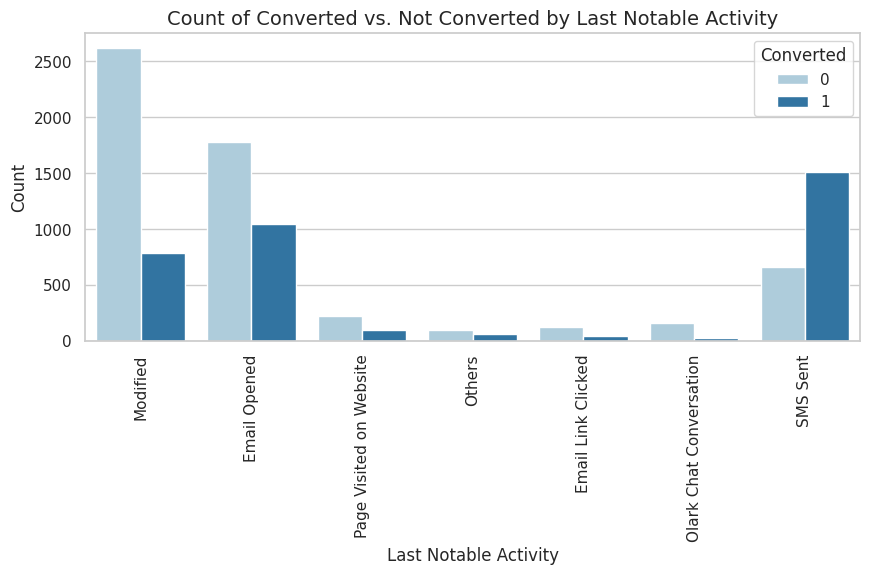

In [43]:

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Set the plot style to whitegrid

# Create the countplot
ax1 = sns.countplot(x="Last Notable Activity", hue="Converted", data=lead_df, palette='Paired')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Customize the plot further if needed
plt.xlabel("Last Notable Activity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Converted vs. Not Converted by Last Notable Activity", fontsize=14)

plt.show()

not able to draw any valuable insights from the column so dropping it.

In [44]:
lead_df.drop('Last Notable Activity',axis=1,inplace=True)

# **Last activity**

In [45]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
lead_df['Last Activity'].isnull().mean()*100

1.1147186147186148

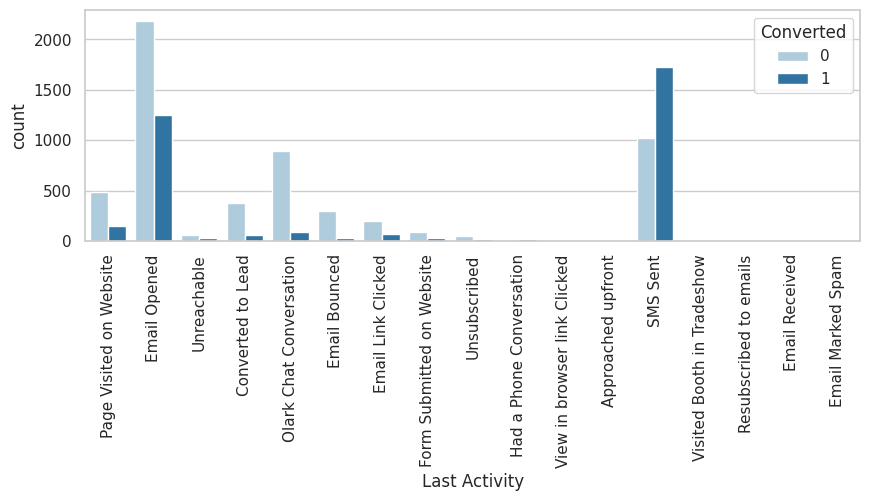

In [47]:
plt.figure(figsize=(10, 3))
sns.set_palette('Paired')  # Set the color palette

# Create the countplot
ax1 = sns.countplot(x="Last Activity", hue="Converted", data=lead_df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

In [48]:
##I am unable to derive any meaningful insights from this column; therefore, I will proceed to drop it.
lead_df=lead_df.drop('Last Activity',axis=1)

In [49]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

# **visualising the data**

Univariate Analysis

**Lead Origin**

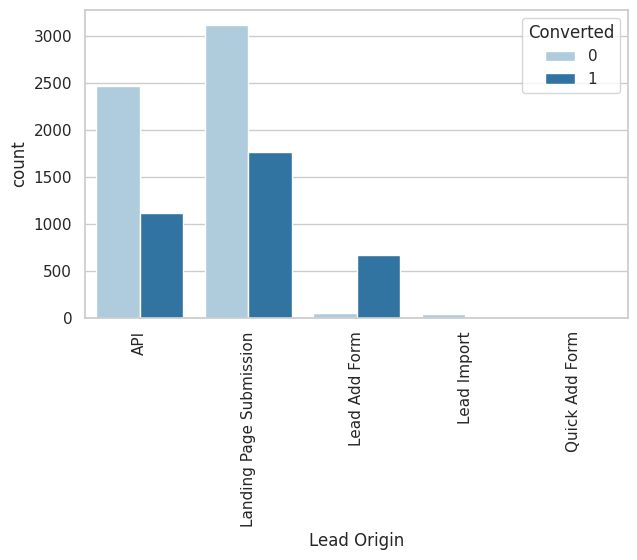

In [50]:
plt.figure(figsize=(7,4))
sns.countplot(x='Lead Origin',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

In [51]:
lead_df['Lead Source'] =lead_df['Lead Source'].replace(['NC_EDM','BLOG','WELEARN'],'Others')

In [52]:
lead_df['Lead Source'].value_counts()

GOOGLE              2909
DIRECT TRAFFIC      2543
OLARK CHAT          1755
ORGANIC SEARCH      1154
REFERENCE            534
WELINGAK WEBSITE     142
REFERRAL SITES       125
Others                78
Name: Lead Source, dtype: int64

**Lead Source**

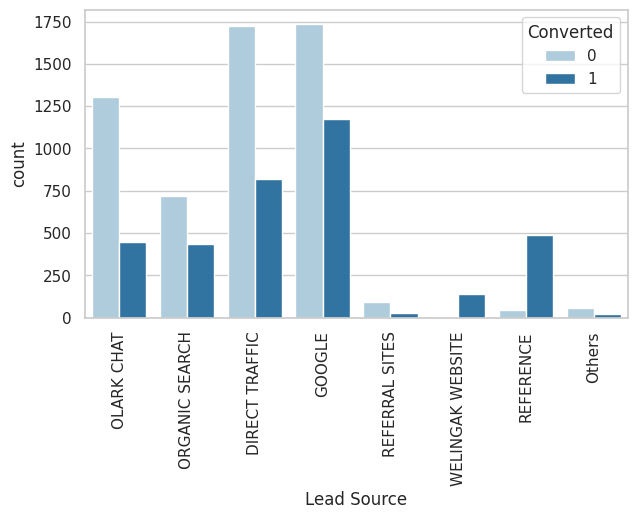

In [53]:
plt.figure(figsize=(7,4))
sns.countplot(x='Lead Source',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

Google and direct traffic generated highest number of leads.

Reference has high conversion rate among them.


**Do Not Email & Do Not Call**

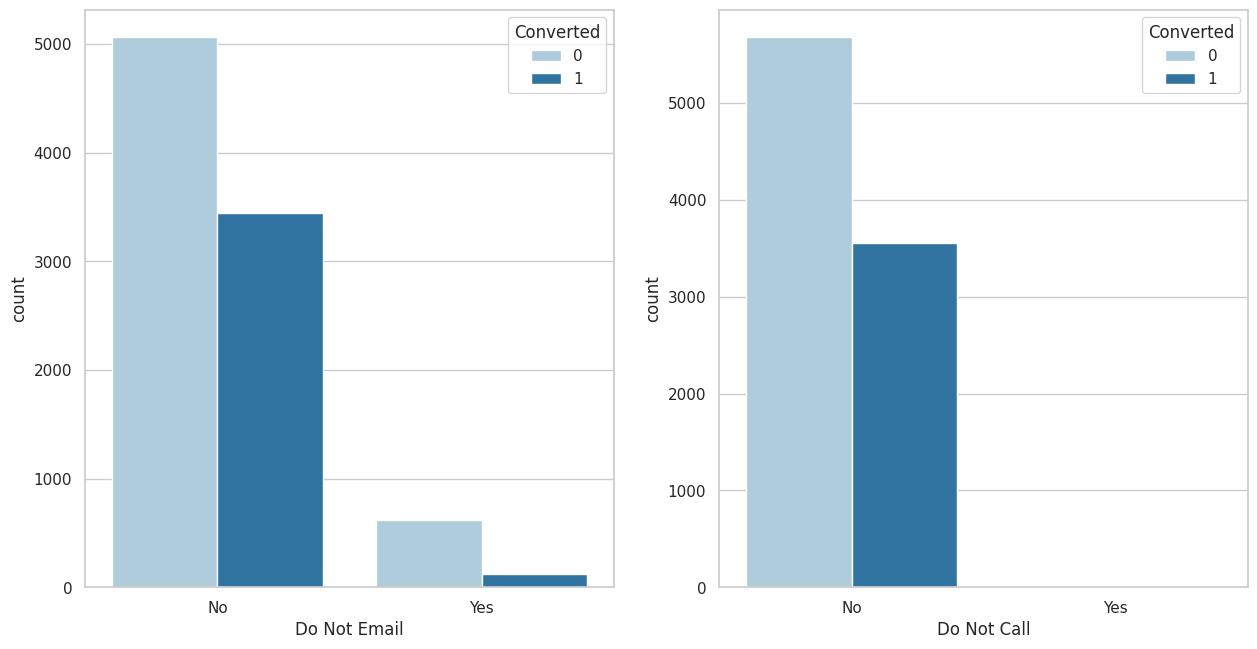

In [54]:
vfig, axs = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot the first subplot
plt.subplot(1, 2, 1)
sns.countplot(x="Do Not Email", hue="Converted", data=lead_df)

# Plot the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x="Do Not Call", hue="Converted", data=lead_df)

# Show the plots
plt.show()

# **Total Time Spent on Website**

<Axes: >

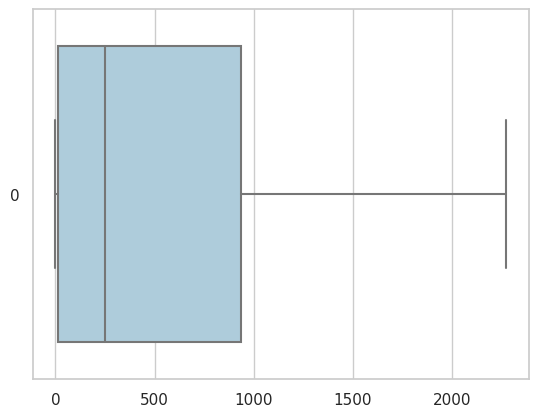

In [55]:
sns.boxplot(lead_df['Total Time Spent on Website'],orient='h')

# **Total Visits**

<Axes: >

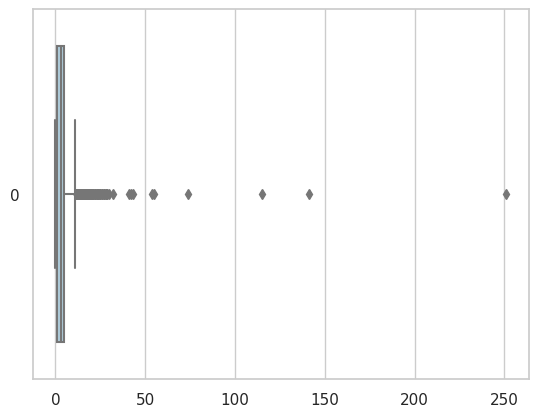

In [56]:
sns.boxplot(lead_df['TotalVisits'],orient="h")

we can clearly observe this columns contians outliers


# **Total Time Spent on Website**

<Axes: >

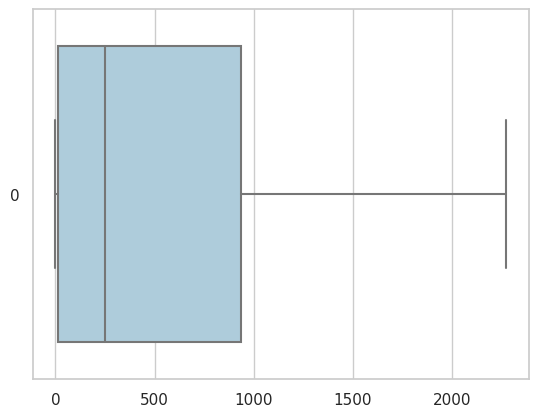

In [57]:
sns.boxplot(lead_df['Total Time Spent on Website'],orient="h")

# **Page Views Per Visit**

<Axes: >

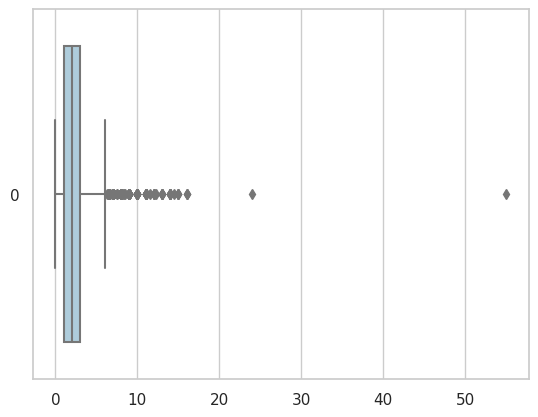

In [58]:
sns.boxplot(lead_df['Page Views Per Visit'],orient="h")

## Data Preparation


In [59]:
#creating a copy of our data set before creating the dummy variable
lead_df1=lead_df.copy()

In [60]:
# Define a dictionary to map values to 1 or 0
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the specified columns
columns_to_map = ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']
lead_df1[columns_to_map] = lead_df1[columns_to_map].applymap(lambda x: mapping.get(x, x))

In [61]:
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,OLARK CHAT,0,0,0,0.0,0,0.0,Unemployed,0
1,API,ORGANIC SEARCH,0,0,0,5.0,674,2.5,Unemployed,0
2,Landing Page Submission,DIRECT TRAFFIC,0,0,1,2.0,1532,2.0,Student,1
3,Landing Page Submission,DIRECT TRAFFIC,0,0,0,1.0,305,1.0,Unemployed,0
4,Landing Page Submission,GOOGLE,0,0,1,2.0,1428,1.0,Unemployed,0


In [62]:
col6 = lead_df1.select_dtypes(include=['object']).columns.tolist()
col6

['Lead Origin', 'Lead Source', 'What is your current occupation']

In [63]:
print(lead_df1['What is your current occupation'].value_counts())
print(lead_df1['Lead Source'].value_counts())
print(lead_df1['Lead Origin'].value_counts())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
GOOGLE              2909
DIRECT TRAFFIC      2543
OLARK CHAT          1755
ORGANIC SEARCH      1154
REFERENCE            534
WELINGAK WEBSITE     142
REFERRAL SITES       125
Others                78
Name: Lead Source, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


In [64]:
columns_to_dummify = ['Lead Origin', 'Lead Source', 'What is your current occupation']

# Create dummy variables for each column and concatenate them to the original DataFrame
lead_df1 = pd.concat([lead_df1] + [pd.get_dummies(lead_df1[col], prefix=col, drop_first=True) for col in columns_to_dummify], axis=1)
lead_df1.drop(columns=columns_to_dummify, inplace=True)


In [65]:
lead_df1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Source_ORGANIC SEARCH,Lead Source_Others,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_WELINGAK WEBSITE,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
#We will divide the dataset into two subsets: a training set and a testing set. The 'Converted' column serves as our target variable
X=lead_df1.drop('Converted', axis=1)
y=lead_df1['Converted']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [68]:
scaler=StandardScaler()
num_cols=X_train.select_dtypes(include=['float64','int64']).columns

In [69]:
num_cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [70]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

In [71]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Lead Source_ORGANIC SEARCH,Lead Source_Others,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_WELINGAK WEBSITE,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5321,-0.294786,-0.011632,0.107319,-0.455314,0.752283,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2575,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3363,-0.294786,-0.011632,-0.286868,-0.396859,-0.168940,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
955,-0.294786,-0.011632,0.895691,-0.798738,0.752283,-0.676536,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6406,-0.294786,-0.011632,-0.483961,-0.718362,-0.629552,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
##conversion ratio
LDR=round((lead_df1['Converted'].sum()/len(lead_df1))*100,2)
LDR

38.54

# **Correlation**

<Axes: >

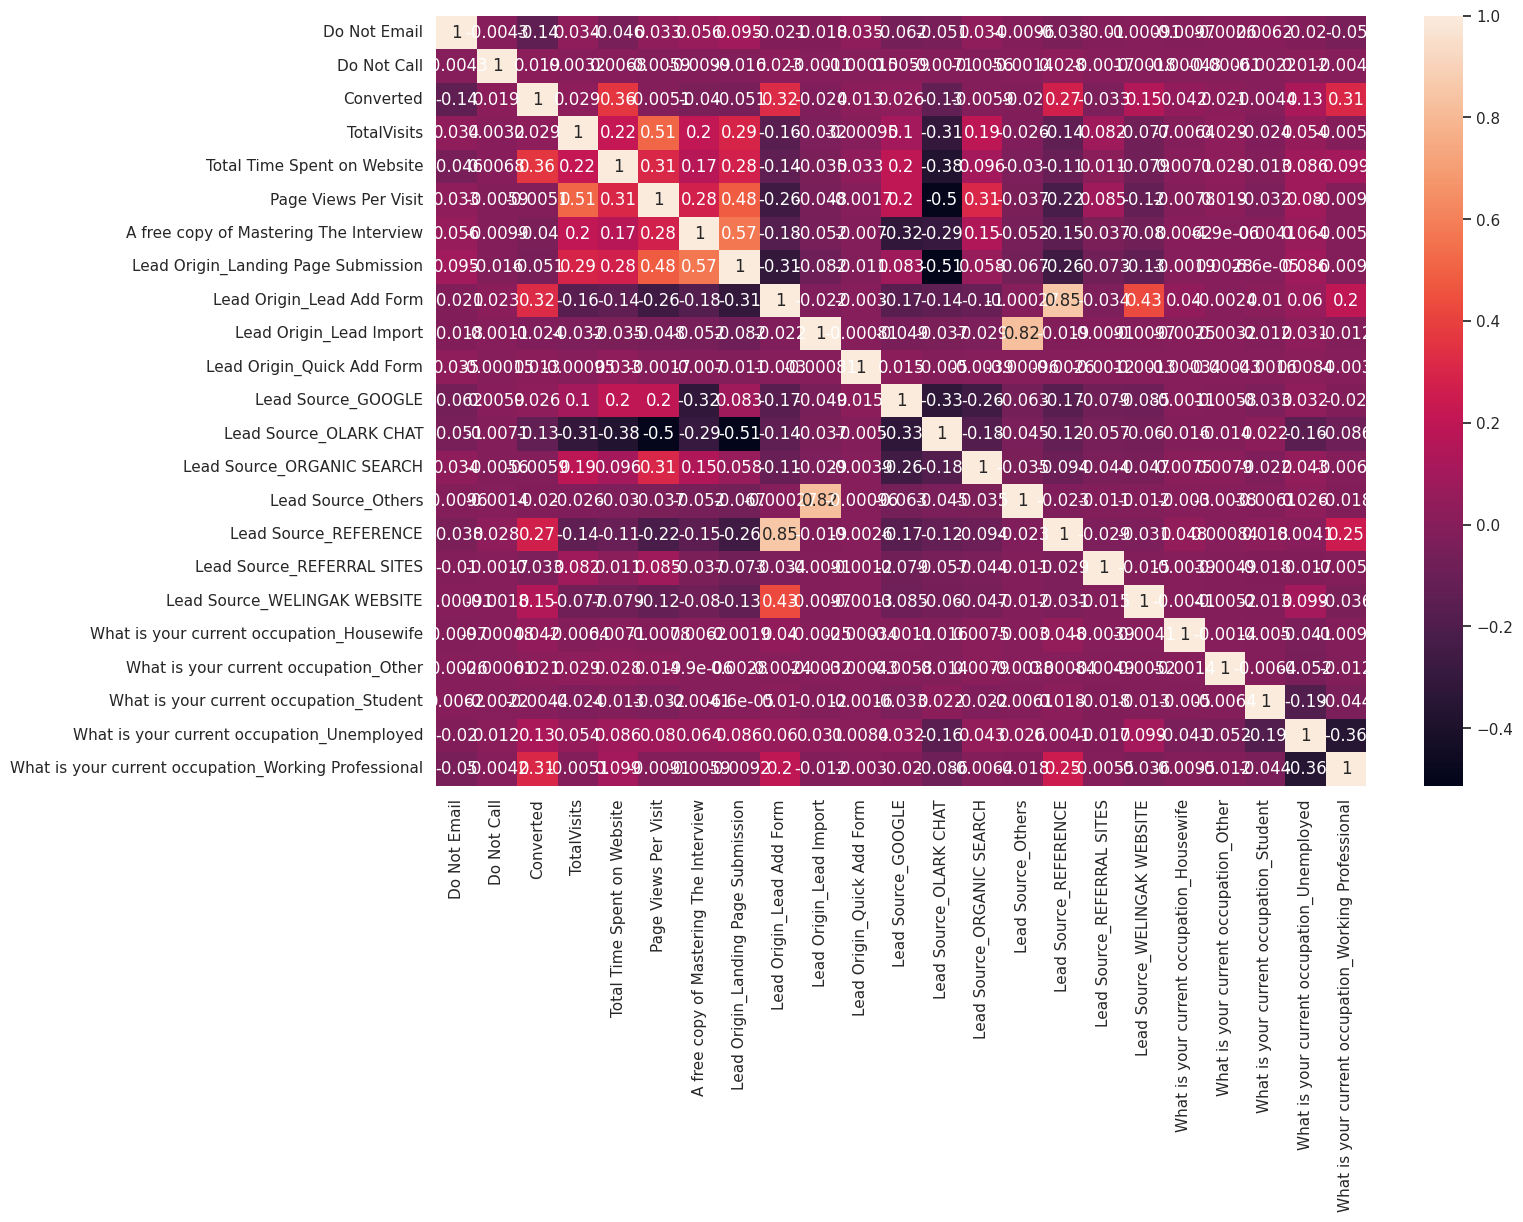

In [73]:
##using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(lead_df1.corr(), annot=True)

In [74]:
lead_df1.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_GOOGLE', 'Lead Source_OLARK CHAT',
       'Lead Source_ORGANIC SEARCH', 'Lead Source_Others',
       'Lead Source_REFERENCE', 'Lead Source_REFERRAL SITES',
       'Lead Source_WELINGAK WEBSITE',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a SimpleImputer instance to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=13)
rfe = rfe.fit(X_train_imputed, y_train)
list(zip(X_train.columns, rfe.support_))


[('Do Not Email', True),
 ('Do Not Call', False),
 ('TotalVisits', False),
 ('Total Time Spent on Website', True),
 ('Page Views Per Visit', False),
 ('A free copy of Mastering The Interview', False),
 ('Lead Origin_Landing Page Submission', False),
 ('Lead Origin_Lead Add Form', True),
 ('Lead Origin_Lead Import', False),
 ('Lead Origin_Quick Add Form', False),
 ('Lead Source_GOOGLE', True),
 ('Lead Source_OLARK CHAT', True),
 ('Lead Source_ORGANIC SEARCH', False),
 ('Lead Source_Others', False),
 ('Lead Source_REFERENCE', True),
 ('Lead Source_REFERRAL SITES', True),
 ('Lead Source_WELINGAK WEBSITE', True),
 ('What is your current occupation_Housewife', True),
 ('What is your current occupation_Other', True),
 ('What is your current occupation_Student', True),
 ('What is your current occupation_Unemployed', True),
 ('What is your current occupation_Working Professional', True)]

# **Logistic Regression model 1**

In [76]:
x_cols=X_train.columns[rfe.support_]

In [77]:
x_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_GOOGLE',
       'Lead Source_OLARK CHAT', 'Lead Source_REFERENCE',
       'Lead Source_REFERRAL SITES', 'Lead Source_WELINGAK WEBSITE',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [78]:
#Creating a new DataFrame from the 'X_train' dataset, including only the columns recommended by Recursive Feature Elimination (RFE).
X_train_rfe=X_train[x_cols]

In [79]:
# Add a constant column to the X_train_rfe DataFrame
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create and fit a logistic regression model
model1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3347.2
Date:                Mon, 18 Sep 2023   Deviance:                       6694.5
Time:                        06:18:02   Pearson chi2:                 8.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3466
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2057      0.081    -27.164      0.000      -2.365      -2.047
Do Not Email                                            -0.3036      0.039     -7.857      0.000      -0.379      -0.228
Total Time Spent on Website                              1.0940      0.036     30.693      0.000       1.024       1.164
Lead Origin_Lead Add Form                                3.0811      0.482      6.394      0.000       2.137       4.026
Lead Source_GOOGLE                                       0.2517      0.071      3.561      0.000       0.113       0.390
Lead Source_OLARK CHAT                                   1.0720      0.094     11.388      0.000       0.888       1.257
Lead Source_REFERENCE                                    0.4351      0.513      0.848      0.396      -0.570       1.440
Lead Source_REFERRAL SITES                              -0.4109      0.300     -1.370      0.171      -0.999       0.177
Lead Source_WELINGAK WEBSITE                             2.8576      0.862      3.316      0.001       1.169       4.546
What is your current occupation_Housewife               22.7878   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Other                    1.6349      0.636      2.570      0.010       0.388       2.882
What is your current occupation_Student                  1.0020      0.199      5.034      0.000       0.612       1.392
What is your current occupation_Unemployed               1.2627      0.077     16.431      0.000       1.112       1.413
What is your current occupation_Working Professional     3.7194      0.176     21.104      0.000       3.374       4.065
========================================================================================================================
"""

In [80]:
## calculating VIFs for variables
def calculate_vif(model_df):
    vif = pd.DataFrame()
    vif['Features'] = model_df.columns
    vif['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Calculate VIFs for all variables in the Logistic Regression Model 1
vif_result = calculate_vif(X_train_rfe)
calculate_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Lead Add Form,18.21
1,Lead Source_REFERENCE,14.55
2,Lead Source_WELINGAK WEBSITE,4.71
3,What is your current occupation_Unemployed,1.61
4,Lead Source_GOOGLE,1.40
5,Lead Source_OLARK CHAT,1.33
6,Total Time Spent on Website,1.26
7,What is your current occupation_Working Profes...,1.20
8,Do Not Email,1.02
9,What is your current occupation_Student,1.02


**Inference**
* High VIF values for 'Lead Add Form' and 'Lead Source_Reference' indicate multicollinearity.
* High p-values are observed for 'Lead Source_Reference', 'current occup_Businessman', and 'current occup_Housewife.'

Excluding the 'Lead Source_Reference' column and retraining the model.

# **Model 2**

In [81]:
# dropping the column 'Lead Source_Reference' and creating the model again
x_cols=x_cols.drop('Lead Source_REFERENCE')

X_train_rfe=X_train[x_cols]
X_train_rfe

# adding a constant column to the dataframe X_train_rfe
X_train_sm2=sm.add_constant(X_train_rfe)

# Creating a fitted model
model2=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3347.6
Date:                Mon, 18 Sep 2023   Deviance:                       6695.2
Time:                        06:18:03   Pearson chi2:                 8.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3465
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2028      0.081    -27.157      0.000      -2.362      -2.044
Do Not Email                                            -0.3062      0.039     -7.928      0.000      -0.382      -0.230
Total Time Spent on Website                              1.0939      0.036     30.690      0.000       1.024       1.164
Lead Origin_Lead Add Form                                3.4666      0.177     19.580      0.000       3.120       3.814
Lead Source_GOOGLE                                       0.2453      0.070      3.489      0.000       0.107       0.383
Lead Source_OLARK CHAT                                   1.0687      0.094     11.364      0.000       0.884       1.253
Lead Source_REFERRAL SITES                              -0.4141      0.300     -1.380      0.167      -1.002       0.174
Lead Source_WELINGAK WEBSITE                             2.4713      0.735      3.361      0.001       1.030       3.912
What is your current occupation_Housewife               22.8001   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Other                    1.6352      0.636      2.572      0.010       0.389       2.881
What is your current occupation_Student                  1.0017      0.199      5.033      0.000       0.612       1.392
What is your current occupation_Unemployed               1.2623      0.077     16.426      0.000       1.112       1.413
What is your current occupation_Working Professional     3.7214      0.176     21.121      0.000       3.376       4.067
========================================================================================================================
"""

In [82]:


def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif

# Calculate VIFs for all variables in X_train_rfe
vif_results = calculate_vif(X_train_rfe)
vif_results

,Features,VIF
0,What is your current occupation_Unemployed,1.61
1,Lead Origin_Lead Add Form,1.56
2,Lead Source_GOOGLE,1.38
3,Lead Source_OLARK CHAT,1.33
4,Lead Source_WELINGAK WEBSITE,1.29
5,Total Time Spent on Website,1.26
6,What is your current occupation_Working Profes...,1.19
7,What is your current occupation_Student,1.02
8,Do Not Email,1.01
9,Lead Source_REFERRAL SITES,1.01


# **Model 3**

In [83]:
# dropping the column 'What is your current occupation_Housewife' and creating the model again
x_cols=x_cols.drop('What is your current occupation_Housewife')

X_train_rfe=X_train[x_cols]
X_train_rfe

# adding a constant column to the dataframe X_train_rfe
X_train_sm3=sm.add_constant(X_train_rfe)

# Creating a fitted model
model3=sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3353.8
Date:                Mon, 18 Sep 2023   Deviance:                       6707.5
Time:                        06:18:03   Pearson chi2:                 8.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3454
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1861      0.081    -27.114      0.000      -2.344      -2.028
Do Not Email                                            -0.3076      0.039     -7.957      0.000      -0.383      -0.232
Total Time Spent on Website                              1.0952      0.036     30.747      0.000       1.025       1.165
Lead Origin_Lead Add Form                                3.5059      0.177     19.803      0.000       3.159       3.853
Lead Source_GOOGLE                                       0.2481      0.070      3.532      0.000       0.110       0.386
Lead Source_OLARK CHAT                                   1.0655      0.094     11.337      0.000       0.881       1.250
Lead Source_REFERRAL SITES                              -0.4172      0.300     -1.391      0.164      -1.005       0.171
Lead Source_WELINGAK WEBSITE                             2.4363      0.735      3.313      0.001       0.995       3.877
What is your current occupation_Other                    1.6162      0.636      2.541      0.011       0.370       2.863
What is your current occupation_Student                  0.9827      0.199      4.937      0.000       0.593       1.373
What is your current occupation_Unemployed               1.2433      0.076     16.293      0.000       1.094       1.393
What is your current occupation_Working Professional     3.7021      0.176     21.034      0.000       3.357       4.047
========================================================================================================================
"""

In [84]:

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif

# Calculate VIFs for all variables in X_train_rfe
vif_results = calculate_vif(X_train_rfe)
vif_results

,Features,VIF
0,What is your current occupation_Unemployed,1.61
1,Lead Origin_Lead Add Form,1.55
2,Lead Source_GOOGLE,1.38
3,Lead Source_OLARK CHAT,1.33
4,Lead Source_WELINGAK WEBSITE,1.28
5,Total Time Spent on Website,1.26
6,What is your current occupation_Working Profes...,1.19
7,What is your current occupation_Student,1.02
8,Do Not Email,1.01
9,Lead Source_REFERRAL SITES,1.01


# **Model** 4

In [85]:
# dropping the column 'Lead Source_REFERRAL SITES' and creating the model again
x_cols=x_cols.drop('Lead Source_REFERRAL SITES')

X_train_rfe=X_train[x_cols]
X_train_rfe

# adding a constant column to the dataframe X_train_rfe
X_train_sm4=sm.add_constant(X_train_rfe)

# Creating a fitted model
model4=sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7381
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3354.8
Date:                Mon, 18 Sep 2023   Deviance:                       6709.6
Time:                        06:18:04   Pearson chi2:                 8.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3452
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1987      0.080    -27.426      0.000      -2.356      -2.042
Do Not Email                                            -0.3069      0.039     -7.941      0.000      -0.383      -0.231
Total Time Spent on Website                              1.0947      0.036     30.742      0.000       1.025       1.164
Lead Origin_Lead Add Form                                3.5150      0.177     19.866      0.000       3.168       3.862
Lead Source_GOOGLE                                       0.2592      0.070      3.712      0.000       0.122       0.396
Lead Source_OLARK CHAT                                   1.0763      0.094     11.486      0.000       0.893       1.260
Lead Source_WELINGAK WEBSITE                             2.4368      0.735      3.314      0.001       0.996       3.878
What is your current occupation_Other                    1.6257      0.636      2.555      0.011       0.379       2.873
What is your current occupation_Student                  0.9894      0.199      4.972      0.000       0.599       1.379
What is your current occupation_Unemployed               1.2453      0.076     16.326      0.000       1.096       1.395
What is your current occupation_Working Professional     3.7035      0.176     21.035      0.000       3.358       4.049
========================================================================================================================
"""

In [86]:

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif

# Calculate VIFs for all variables in X_train_rfe
vif_results = calculate_vif(X_train_rfe)
vif_results

,Features,VIF
0,What is your current occupation_Unemployed,1.59
1,Lead Origin_Lead Add Form,1.55
2,Lead Source_GOOGLE,1.38
3,Lead Source_OLARK CHAT,1.33
4,Lead Source_WELINGAK WEBSITE,1.28
5,Total Time Spent on Website,1.26
6,What is your current occupation_Working Profes...,1.19
7,What is your current occupation_Student,1.02
8,Do Not Email,1.01
9,What is your current occupation_Other,1.00


1. All variables in our Model 4 exhibit VIF values less than 5, indicating the absence of multicollinearity among the variables.
2. Every variable in Model 4 possesses a p-value less than 0.05, signifying their statistical significance.
3. Given these observations, we have chosen Logistic Regression Model 4 as our ultimate model for prediction.

# **Model evaluation**

In [87]:
y_pred=model2.predict(X_train_sm2).values.reshape(-1)

In [88]:
y_pred[:10]

array([0.24917138, 0.8376294 , 0.07264862, 0.10545419, 0.05223287,
       0.57890185, 0.17680554, 0.3804676 , 0.24879772, 0.11716433])

In [89]:
##Constructing a DataFrame that includes the 'Converted' column and the predicted probability of conversion.
train_predicts= pd.DataFrame({'Converted':y_train,'prob_conversion':y_pred})
train_predicts['prob_conversion']=round(train_predicts['prob_conversion'],2)
train_predicts['Prospects ID']= X_train.index

In [90]:
train_predicts

,Converted,prob_conversion,Prospects ID
5321,0,0.25,5321
2575,1,0.84,2575
3363,0,0.07,3363
955,0,0.11,955
6406,0,0.05,6406
...,...,...,...
2895,0,0.31,2895
7813,0,0.26,7813
905,0,0.26,905
5192,0,0.33,5192


In [91]:
##Assigning a label of 'converted' (1) to probabilities greater than 0.5 and 'not_converted' (0) to probabilities less than or equal to 0.5.
train_predicts['Predicted']=train_predicts['prob_conversion'].apply(lambda x:0 if x<=0.5 else 1)

# **Confusion matrix**

In [92]:
confusion_matrix=metrics.confusion_matrix(train_predicts['Converted'],train_predicts['Predicted'])

In [93]:
confusion_matrix


array([[4067,  493],
       [1005, 1827]])

Actual/Predicted not_converted converted

not_converted ------------ 4067---------------493

converted----------------- 1005 --------------1827

In [94]:
##Computing various classification metrics, including Accuracy, Sensitivity,
##Specificity, False Positive Rate, Precision, Recall, and Negative Predictive Value.
def Con_Mat_Func(confusion_matrix):
    TP = confusion_matrix[1,1] # true positive
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives

    acc = round((TN+TP) / float(TN+TP+FN+FP), 4)
    sens = round(TP / float(TP+FN), 4)
    spec = round(TN / float(TN+FP), 4)
    fprate = round(FP/ float(TN+FP), 4)
    prec = round(TP / float(TP+FP), 4)
    recal = round(TP / float(TP+FN), 4)
    npval = round(TN / float(TN+ FN), 4)

    print('Accuracy                  =', acc)
    print('Sensitivity               =', sens)
    print('Specificity               =', spec)
    print('False Positive Rate       =', fprate)
    print('Precision                 =', prec)
    print('Recall                    =', recal)
    print('Negative Predictive Value =', npval)

In [95]:
Con_Mat_Func(confusion_matrix)

Accuracy                  = 0.7973
Sensitivity               = 0.6451
Specificity               = 0.8919
False Positive Rate       = 0.1081
Precision                 = 0.7875
Recall                    = 0.6451
Negative Predictive Value = 0.8019


# **ROC CURVE**

In [96]:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

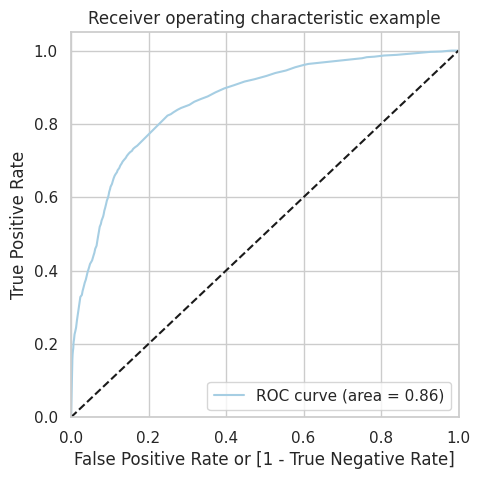

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( train_predicts['Converted'], train_predicts['prob_conversion'],
                                         drop_intermediate = False )
draw_roc(train_predicts['Converted'],train_predicts['prob_conversion'])

# **Finding optimal cutoff points**

In [98]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_predicts[i]= train_predicts['prob_conversion'].map(lambda x: 1 if x > i else 0)

train_predicts.head()

,Converted,prob_conversion,Prospects ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5321,0,0.25,5321,0,1,1,1,0,0,0,0,0,0,0
2575,1,0.84,2575,1,1,1,1,1,1,1,1,1,1,0
3363,0,0.07,3363,0,1,0,0,0,0,0,0,0,0,0
955,0,0.11,955,0,1,1,0,0,0,0,0,0,0,0
6406,0,0.05,6406,0,1,0,0,0,0,0,0,0,0,0


In [99]:
train_predicts.columns

Index([      'Converted', 'prob_conversion',    'Prospects ID',
             'Predicted',               0.0,               0.1,
                     0.2,               0.3,               0.4,
                     0.5,               0.6,               0.7,
                     0.8,               0.9],
      dtype='object')

In [100]:


# Create an empty DataFrame to store the results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = metrics.confusion_matrix(train_predicts['Converted'], (train_predicts[i] >= i).astype(int))
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])

    # Use the index as the key to avoid KeyError
    cutoff_df.loc[num.index(i)] = [i, accuracy, sensi, speci]

print(cutoff_df)


   prob  accuracy     sensi     speci
0   0.0  0.383117  1.000000  0.000000
1   0.1  0.522321  0.981992  0.236842
2   0.2  0.704140  0.905720  0.578947
3   0.3  0.774621  0.826624  0.742325
4   0.4  0.801407  0.701624  0.863377
5   0.5  0.797348  0.645127  0.891886
6   0.6  0.779627  0.563206  0.914035
7   0.7  0.754329  0.459393  0.937500
8   0.8  0.732413  0.353460  0.967763
9   0.9  0.691423  0.205508  0.993202


<Figure size 1200x600 with 0 Axes>

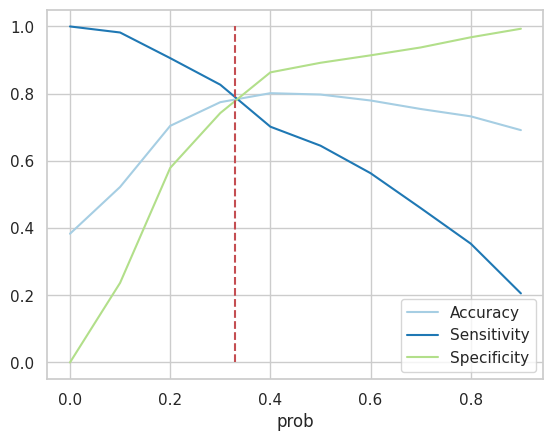

In [101]:
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.legend(labels=['Accuracy','Sensitivity','Specificity'])
plt.vlines(x=0.33,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [102]:
train_predicts['final_predicted']=train_predicts['prob_conversion'].apply(lambda x:1 if x>0.33 else 0)

In [103]:
train_predicts

,Converted,prob_conversion,Prospects ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5321,0,0.25,5321,0,1,1,1,0,0,0,0,0,0,0,0
2575,1,0.84,2575,1,1,1,1,1,1,1,1,1,1,0,1
3363,0,0.07,3363,0,1,0,0,0,0,0,0,0,0,0,0
955,0,0.11,955,0,1,1,0,0,0,0,0,0,0,0,0
6406,0,0.05,6406,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,0.31,2895,0,1,1,1,1,0,0,0,0,0,0,0
7813,0,0.26,7813,0,1,1,1,0,0,0,0,0,0,0,0
905,0,0.26,905,0,1,1,1,0,0,0,0,0,0,0,0
5192,0,0.33,5192,0,1,1,1,1,0,0,0,0,0,0,0


In [104]:
# dropping unnecessary columns
train_predicts.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)

In [105]:
train_predicts

,Converted,prob_conversion,Prospects ID,final_predicted
5321,0,0.25,5321,0
2575,1,0.84,2575,1
3363,0,0.07,3363,0
955,0,0.11,955,0
6406,0,0.05,6406,0
...,...,...,...,...
2895,0,0.31,2895,0
7813,0,0.26,7813,0
905,0,0.26,905,0
5192,0,0.33,5192,0


In [106]:
confusion_matrix2=metrics.confusion_matrix(train_predicts['Converted'],train_predicts['final_predicted'])

In [107]:
confusion_matrix2

array([[3807,  753],
       [ 747, 2085]])

Actual/Predicted      not_converted      converted  
not_converted--------------3807------------753

converted -----------------747-------------2085

In [108]:
Con_Mat_Func(confusion_matrix2)

Accuracy                  = 0.7971
Sensitivity               = 0.7362
Specificity               = 0.8349
False Positive Rate       = 0.1651
Precision                 = 0.7347
Recall                    = 0.7362
Negative Predictive Value = 0.836


# Precision and Recall

In [109]:
train_predicts['Converted'], train_predicts['prob_conversion']
preci, recal, thresholds = precision_recall_curve(train_predicts['Converted'], train_predicts['prob_conversion'])

In [110]:
true_labels = train_predicts['Converted']
predicted_labels = train_predicts['final_predicted']

# Calculate true positives, false positives, and false negatives
true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))
false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))

# Calculate precision and recall
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

# Round the scores to four decimal places
precision = round(precision, 4)
recall = round(recall, 4)

print('Precision score =', precision)
print('Recall score    =', recall)

Precision score = 0.7347
Recall score    = 0.7362


In [111]:
## Creating precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(train_predicts['Converted'],train_predicts['prob_conversion'])

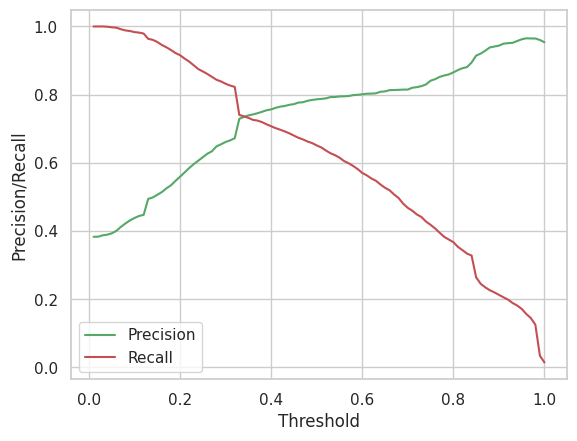

In [112]:
#Generate a precision-recall tradeoff curve.
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")


# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [113]:
cols=X_test.select_dtypes(['float64','int64']).columns

In [114]:
cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [115]:
X_test[cols] = scaler.transform(X_test[cols])
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Lead Source_ORGANIC SEARCH,Lead Source_Others,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_WELINGAK WEBSITE,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2140,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7707,-0.294786,-0.011632,0.107319,1.853659,-0.168940,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1522,-0.294786,-0.011632,-0.089774,0.978660,-0.399246,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1873,-0.294786,-0.011632,-0.286868,-0.552131,-0.168940,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8100,-0.294786,-0.011632,1.881157,2.259190,0.406824,-0.676536,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,-0.294786,-0.011632,0.501505,-0.502809,1.673506,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7173,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
634,-0.294786,-0.011632,-0.286868,-0.846232,-0.168940,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4406,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [116]:
X_test = X_test[x_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_GOOGLE,Lead Source_OLARK CHAT,Lead Source_WELINGAK WEBSITE,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2140,-0.294786,-0.891900,1,0,0,0,0,0,1,0
7707,-0.294786,1.853659,0,0,0,0,0,1,0,0
1522,-0.294786,0.978660,0,0,0,0,0,0,1,0
1873,-0.294786,-0.552131,0,1,0,0,0,0,1,0
8100,-0.294786,2.259190,0,1,0,0,0,0,1,0


In [117]:
X_test_sm=sm.add_constant(X_test)

In [119]:
# Making predictions for y_test
y_test_predict = pd.DataFrame(model4.predict(X_test_sm), columns=['predicted_value'])

# Resetting the index

y_test_predict.reset_index(drop=True, inplace=True)
y_test_predict

,predicted_value
0,0.842340
1,0.713074
2,0.551919
3,0.230033
4,0.866393
...,...
1843,0.239735
1844,0.118339
1845,0.143160
1846,0.873796


In [120]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
2140,1,2140
7707,1,7707
1522,1,1522
1873,0,1873
8100,1,8100


In [122]:
#resetting index for y_test_df
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,Converted,Prospect ID
0,1,2140
1,1,7707
2,1,1522
3,0,1873
4,1,8100


In [123]:
y_pred_final=pd.concat([y_test_df,y_test_predict],axis=1)

In [124]:
y_pred_final.head()

,Converted,Prospect ID,predicted_value
0,1,2140,0.842340
1,1,7707,0.713074
2,1,1522,0.551919
3,0,1873,0.230033
4,1,8100,0.866393


# **ROC CURVE**

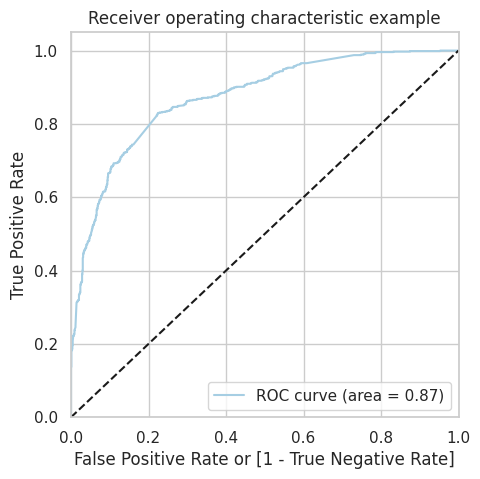

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted'], y_pred_final['predicted_value'],
                                         drop_intermediate = False )
draw_roc(y_pred_final['Converted'],y_pred_final['predicted_value'])

In [126]:
##"Using a probability cutoff of 0.33 during training,
## we employ the sensitivity-specificity method to determine whether a conversion occurred or not."
y_pred_final['conversion_pred'] = (y_pred_final['predicted_value'] > 0.33).astype(int)


In [127]:

confusion_matrix_final = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['conversion_pred'])
print(confusion_matrix_final)


[[948 171]
 [191 538]]


In [128]:
Con_Mat_Func(confusion_matrix_final)

Accuracy                  = 0.8041
Sensitivity               = 0.738
Specificity               = 0.8472
False Positive Rate       = 0.1528
Precision                 = 0.7588
Recall                    = 0.738
Negative Predictive Value = 0.8323


In [129]:
y_pred_final['Lead Score'] = (y_pred_final['predicted_value'] * 100).astype(int)


In [130]:
y_pred_final.head()

,Converted,Prospect ID,predicted_value,conversion_pred,Lead Score
0,1,2140,0.842340,1,84
1,1,7707,0.713074,1,71
2,1,1522,0.551919,1,55
3,0,1873,0.230033,0,23
4,1,8100,0.866393,1,86


In [131]:
y_pred_final.sort_values(by='Lead Score', ascending=False)

,Converted,Prospect ID,predicted_value,conversion_pred,Lead Score
261,1,3032,0.996547,1,99
363,1,7579,0.998939,1,99
99,1,2378,0.997695,1,99
1580,1,4900,0.993434,1,99
818,1,177,0.998631,1,99
...,...,...,...,...,...
1180,0,5533,0.018927,0,1
1201,0,702,0.018235,0,1
174,0,3531,0.015247,0,1
821,0,3682,0.016857,0,1


# **Final conclusion:**
**After running the model on the Train Dataset these are the figures we obtain:**

Accuracy    :  79.71

Sensitivity :  73.62

Specificity :  83.49

**After running the model on the Test Dataset these are the figures we obtain:**

Accuracy    : 80.41

Sensitivity : 73.80

Specificity : 84.72

# **Equation**
ln(odd)= -2.1987(const)+-0.3069(don't email)+1.0947(spent on website)+3.5150(lead add form)+0.2592(google)+1.0763(olark chat)+2.4368(welingak_website)+1.6257(occupation_other)+0.9894(occupation_student)+1.2453(occupation_unemployed)+3.7035(occuption_work_prof)